In [2]:
# load default python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
plt.style.use('seaborn-whitegrid')

# Reading data and first exploration

In [3]:
#read data
df_train = pd.read_csv('train.csv',nrows = 50000, parse_dates=["pickup_datetime"])
df_train.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
# check datatypes
df_train.dtypes

key                          object
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [5]:
# check statistics of the features
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734371,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [6]:
# check/remove unreasonable data
print('Old size: %d' %len(df_train))
df_train = df_train[df_train.fare_amount>=0]
print('New size: %d' %len(df_train))

Old size: 50000
New size: 49994


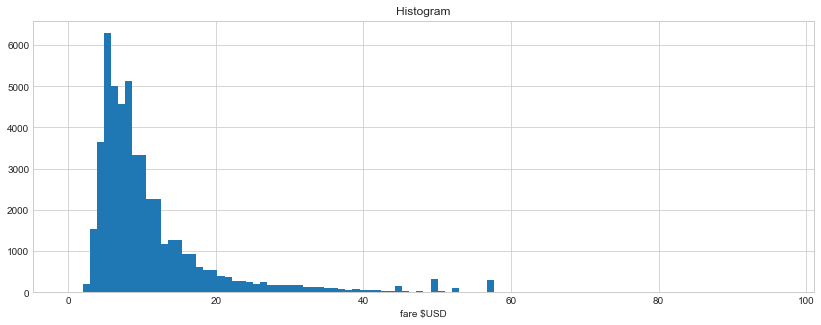

In [7]:
# plot histogram of fare
df_train[df_train.fare_amount<100].fare_amount.hist(bins=100,figsize=(14,5))
plt.xlabel('fare $USD')
plt.title('Histogram');


# Remove missing data

In [8]:
#find which column has null value
print(df_train.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [9]:
print('Old size: %d' % len(df_train))
df_train = df_train.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(df_train))


Old size: 49994
New size: 49994


# Test data

In [10]:
# read data in pandas dataframe
df_test = pd.read_csv('test.csv')
df_test.head(5)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,08:24.0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,08:24.0,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,53:44.0,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,12:12.0,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,12:12.0,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [11]:
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


# Location data

Easy to use map and GPS tool: https://www.gps-coordinates.net/
Calculate distance between locations: https://www.travelmath.com/flying-distance/
Open street map to grab using bouding box a map: https://www.openstreetmap.org/export#map=8/52.154/5.295

In [12]:
# find the location arrange:
# max and min longitude test set
min(df_test.pickup_longitude.min(), df_test.dropoff_longitude.min()),\
max(df_test.pickup_longitude.max(), df_test.dropoff_longitude.max())

(-74.263242, -72.986532)

In [13]:
# max and min latitude test set
min(df_test.pickup_latitude.min(), df_test.dropoff_latitude.min()),\
max(df_test.pickup_latitude.max(), df_test.dropoff_latitude.max())

(40.568973, 41.709555)

In [14]:
# make sure the new data is within the location area(BB for bounding box)
def select_within_boundingbox(df,BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])

# load image of NYC map            
BB = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('http://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')
# load extra image to zoom in on NYC
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('http://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')


In [17]:
print('Old size: %d' % len(df_train))
df_train = df_train[select_within_boundingbox(df_train,BB)]
print('New size: %d' % len(df_train))

Old size: 48938
New size: 48938


In [18]:
# function of plot data on the NYC map
def plot_on_map(df, BB, nyc_map, s=10, alpha = 0.2):
    fig, axs = plt.subplots(1,2,figsize=(16,10))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r',s=s)
    axs[0].set_xlim((BB[0],BB[1]))
    axs[0].set_ylim((BB[2],BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map,zorder=0, extent=BB)
    
    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

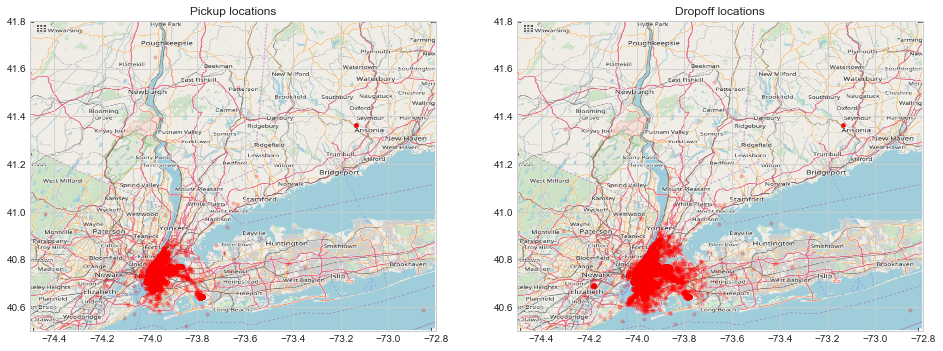

In [19]:
# plot training data on the map
plot_on_map(df_train, BB, nyc_map)

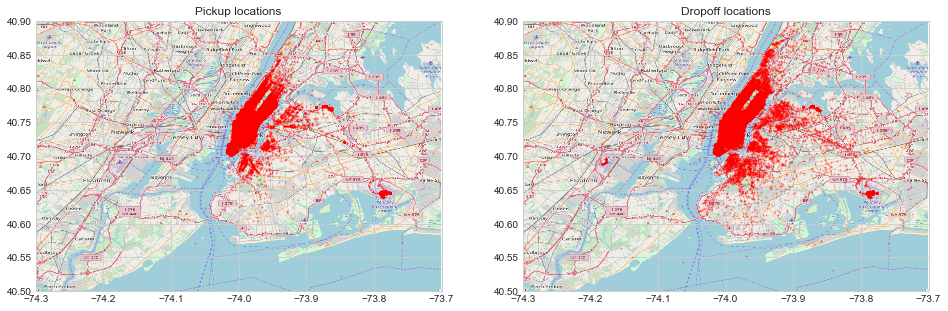

In [20]:
# plot training data on map zoomed in
plot_on_map(df_train, BB_zoom, nyc_map_zoom, s=1, alpha=0.3)

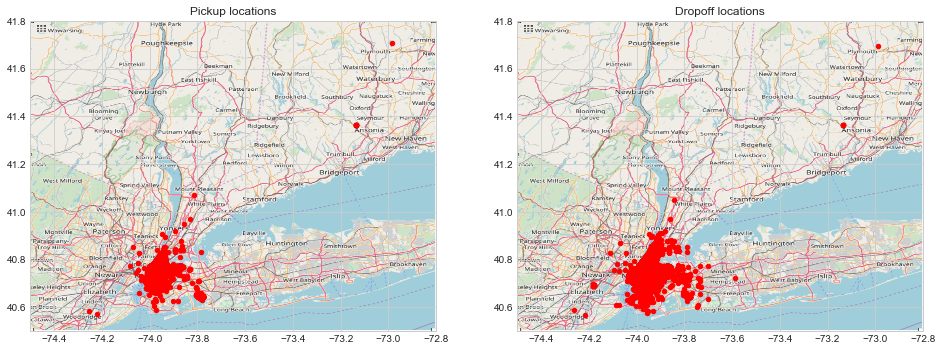

In [21]:
# plot test data on the map
plot_on_map(df_test, BB, nyc_map, alpha=1.0, s=20)

# Removing datapoint in water

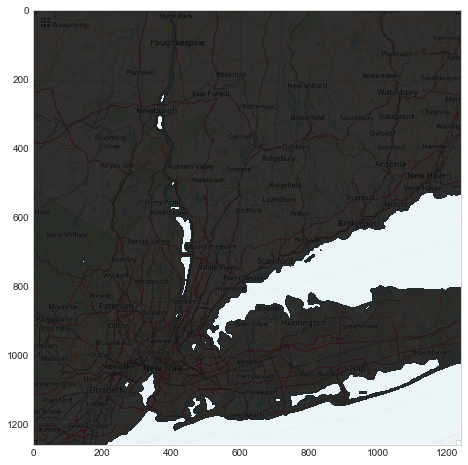

In [22]:
# read nyc mask and turn into boolean map with
# land = True, water = False
nyc_mask = plt.imread('https://aiblog.nl/download/nyc_mask-74.5_-72.8_40.5_41.8.png')\
                        [:,:,0] > 0.9
plt.figure(figsize=(8,8))
plt.imshow(nyc_map, zorder=0)
plt.imshow(nyc_mask, zorder=1,alpha=0.8);


In [42]:
# read nyc mask and turn into boolean map with
# land = True, water = False
nyc_mask = plt.imread('https://aiblog.nl/download/nyc_mask-74.5_-72.8_40.5_41.8.png')[:,:,2]>0.1
# 遍历图片找出， >0.x 显示所有值为1的点，<0.x 则显示所有为0的点
plt.figure(figsize=(8,8))
#plt.imshow(nyc_map, zorder=0)
#plt.imshow(nyc_mask, zorder=1);

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [40]:
# Convert longitude/latitude coordinate to xy pixel coordinate(to match the mask frame)

def lonlat_to_xy(longitude, latitude, dx, dy,BB):
    # dx/dy, means the number of pixel
    return (dx*(longitude-BB[0])/(BB[1]-BB[0])).astype('int'), \
(dy- dy*(latitude-BB[2])/(BB[3]-BB[2])).astype('int')

In [32]:
print(nyc_mask.shape[1],len(nyc_mask[0]),nyc_mask.shape[0],len(nyc_mask))

(1242, 1242, 1262, 1262)


In [41]:
pickup_x,pickup_y = lonlat_to_xy(df_train.pickup_longitude, df_train.pickup_latitude, \
                                nyc_mask.shape[1],nyc_mask.shape[0],BB)
dropoff_x,dropoff_y = lonlat_to_xy(df_train.dropoff_longitude, df_train.dropoff_latitude, \
                                nyc_mask.shape[1],nyc_mask.shape[0],BB)

In [48]:
# count all the true(not in water) data from
idx = (nyc_mask[pickup_y,pickup_x] & nyc_mask[dropoff_y,dropoff_x])
#a= np.sum(~idx)
#print(a)
print("Number of trips in water: {}".format(np.sum(~idx)))

Number of trips in water: 12


In [51]:
# overall fucntion of remove data in the water

def remove_datapoints_from_water(df):
    def lonlat_to_xy(longitude, latitude, dx, dy, BB):
        return (dx*(longitude-BB[0])/(BB[1]-BB[0])).astype('int'), \
(dy- dy*(latitude-BB[2])/(BB[3]-BB[2])).astype('int')
    # define bounding box
    BB = (-74.5, -72.8, 40.5, 41.8)
    # read nyc mask, return into boonlean map with
    # land = True, water = False
    nyc_mask = plt.imread('https://aiblog.nl/download/nyc_mask-74.5_-72.8_40.5_41.8.png')[:,:,0]>0.9
    # calculate each lon, lat coordinate the xy coordinate in the mask map
    pickup_x,pickup_y = lonlat_to_xy(df_train.pickup_longitude, df_train.pickup_latitude, \
                                nyc_mask.shape[1],nyc_mask.shape[0],BB)
    dropoff_x,dropoff_y = lonlat_to_xy(df_train.dropoff_longitude, df_train.dropoff_latitude, \
                                nyc_mask.shape[1],nyc_mask.shape[0],BB)
    # calculate boolean index
    idx = nyc_mask[pickup_y, pickup_x] & nyc_mask[dropoff_y, dropoff_x]
    return df[idx]

In [52]:
print('Old size: %d' %len(df_train))
df_train = remove_datapoints_from_water(df_train)
print('New size: %d' %len(df_train))

Old size: 48938
New size: 48926


In [54]:
#plot_on_map(df_train, BB, nyc_map)

data point density per sq mile
to give a better view of the "hot spots"

In [ ]:
# a function to calculate the distance in mile between location in lon, lat
# https://stackoverflow.com/questions/27928/
# https://dothinking.github.io/blog/2017/03/09/%E7%90%83%E9%9D%A2%E8%B7%9D%E7%A6%BB%E4%B8%8E%E6%96%B9%E4%BD%8D%E8%A7%92%E5%85%AC%E5%BC%8F%E7%9A%84%E6%8E%A8%E5%AF%BC-%E5%90%91%E9%87%8F%E4%BB%A3%E6%95%B0%E6%B3%95.html

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) # 2*R*asin...

n_lon, n_lat = 200, 200 # the number of grid bin perlongtitude , latitude dimention
density_pickup, density_dropoff = np.zeros(n_lon, n_lat), np.zeros(n_lon, n_lat)
# prepare the array


# calculate the number of datapoints in a grid area
bins_lon = np.zeros(n_lon+1) # bin
bins_lat = np.zeros(n_lat+1) # bin
delta_lon = (BB[1]-BB[0])/n_lon # bin longutide width
delta_lat = (BB[3]-BB[2])/n_lat # bin latitude height
bin_width_miles = distance(BB[2], BB[1], BB[2], BB[0])/n_lon # bin width in miles
bin_height_miles = distance(BB[3], BB[0], BB[2], BB[0])/n_lat # bin height in miles

for i in range(n_lon+1):
    bins_lon[i] = BB[0] + i* delta_lon
for j in range(n_lat+1):
    bins_lat[j] = BB[0] + j* delta_lat

# Digitize per longitude, latitude dimension
# numpy.digitize(x, bins, right=False)¶
#Return the indices of the bins to which each value in input array belongs.
inds_pickup_lon = np.digitize(df_train.pickup_longitude, bins_lon)
inds_pickup_lat = np.digitize(df_train.pickup_latitude, bins_lat)
inds_dropoff_lon = np.digitize(df_train.dropoff_longitude, bins_lon)
inds_dropoff_lat = np.digitize(df_train.dropoff_latitude, bins_lat)


# Count per grid bin
for i in range(n_lon):
    for j in range(n_lat):
        density_pickup
